# STEP 0: Preperation of the Workbench

Let's start with importing relevant software and the dataset to the kernel: 

In [344]:
# Import Dependencies
%matplotlib inline

# Import useful python packages
import os, math, time, random, datetime

# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for visualization 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

Next step is importing dataset(s) and asssigning to variable(s).

In titanic dataset, we have seperated data for the training and test of models:

In [345]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

We keep test dataset for model validation in further steps and focus on training data. 

For the Titanic dataset, a brief description of the columns are also provided:

--survival:         Survival (0 = No; 1 = Yes)

--pclass:          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

--name:            Name

--sex:             Sex

--age:            Age

--sibsp:           Number of Siblings/Spouses Aboard

--parch:           Number of Parents/Children Aboard

--ticket:          Ticket Number

--fare:           Passenger Fare

--cabin:           Cabin

--embarked:        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# STEP 1: An Overview of the Dataset

A generic way to start any analysis is to have an overview of what we have. It is important to be aware of the dimensions, types and basic statistical properties of the data we will exploit.

In [346]:
train.shape

(891, 12)

In [347]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We have 891 rows and 12 columns that means there are 891 records for 12 topics. 7 columns are numeric (integer or float) whereas the others are encoded as objects (text, combination of numeric and non-numeric values, etc.). In most cases, the columns in object type requires carefull processing to be used in modeling. In any case, it is helpful to see a bunch of it, especially for the better undestanding of the columns in object type.

In [348]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [349]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Having the fundamentals of the dataset, it is time to get a statistical perspective for the columns in numeric datatype:

In [350]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This table helps us for some quick checks:

--The colums with missing values (check the count row): Age

--The columns with outliers (compare the min and max values with the mean): Fare(?)

All columns will be carefully investigated one-by-one later but it would be informative to obsorve at the very begining. To have a similar insight for the rest of the dataset (columns with non-numeric or mixed datatypes), we have to select the relevant part of the dataset (eliminate numeric columns)

In [351]:
objects = train.dtypes[train.dtypes == "object"].index
train[objects].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Carter, Mr. William Ernest",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


-- The count info highlights the columns with missing data: the "Cabin" column is missing data for more than 75% of the recordings.

-- The uniqueness info is valuable to differentiate categorical data: for the "Sex" and "Embarked" columns, there are just few options that makes categorization very convenient.

--The "freq" row shows the appearance of most frequent category.



# STEP 2: Detailed Assessment of Columns

An integral part of any data analysis or modeling is to have a reliable understanding of the columns (candidate parameters of analysis and modeling) with a focus on: 

-- Missing data

-- Outliers and strange values

-- The frequency distribution of the data

This can save enormous amount of time in further processes by preventing selection of discordant methods or tools for the proposed analysis. Simple visualisations are helpful at this stage to get an intuitive understanding of data quality. 


The "count" row of the describe() method gives us a general idea about mising values: the "Age" column has 177 (891-714) and the "Cabin" column has 687(!) (891-204) mising value out of 891. The "Embarked" column has just 2 missing values (see the charts above). For a more comprehensive understanding of the missing values, it is useful to observe their distribution and the python package called Missingo is a great tool for this. Especially if one intended to delete the rows with with missing values in a specific column, it is helpful to "obsorve" (in the matrix form ) what amout of data will be lost in other columns (are they missing as well or not?). Moreover, if you wish to "quantify" this interaction (nullity correlation), the heat map option presents it. (Note that it is possible to get similar visualization with Seaborn's heatmap function)

<AxesSubplot:>

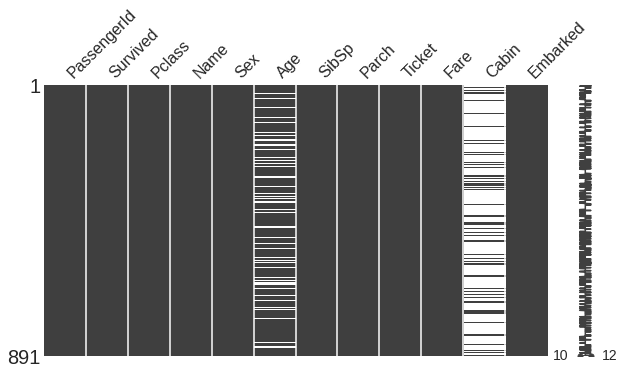

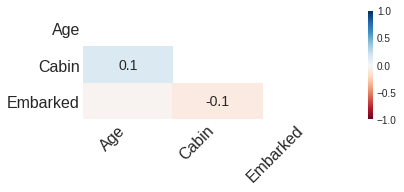

In [352]:
msno.matrix(train, figsize = (10,5))
msno.heatmap(train,figsize = (6,2))

# sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

Having a general overview of missing values in the dataset, let's start investigating columns with the "Age" column. It contains numbers in float type and distributed as below:

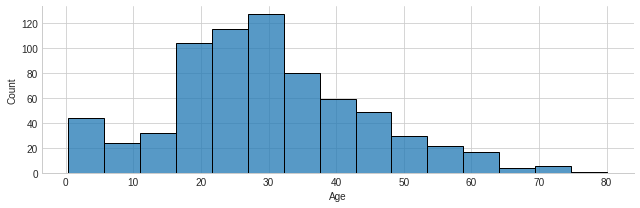

In [353]:
sns.displot(train['Age'], bins=15, kde=False, height=3, aspect=3)
plt.show()

Beside missing values, the "Age" column seems as expected: there are no strange values (a negative value,i.e.) and the frequency distribution seems reasonable.

The "Cabin" column has lots of missing values. The existing ones are in text format and generally consist of a capital letter (shows ship region) followed by numbers (shows room number):

In [354]:
cabin_str = train["Cabin"].astype(str).unique() # Convert data to str and eliminate repeating values
print(cabin_str)

['nan' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


As can be seen above, some of the existing values are not in defined format (strange values). For instance, there are some just with letter (D, T, i.e.) or some with multi-records (like "D10 D12"). The high number of missing values and the strange ones among the existing values prevent reliable investigation about its impact. Hence, this column can be dropped.

The "Pclass" column has no missing values and involves only 3 different numeric values (that make it a proper candidate for categorical data):

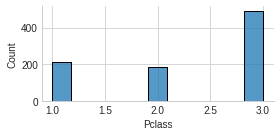

In [355]:
sns.displot(train['Pclass'], kde=False, height=2, aspect=2)
plt.show()

The "Name" column has no missing value and involves unique texts each record: 

In [356]:
train["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

It seems reasonable to claim that the name of a person (891 unique records) can't influence or determine the survival of a passenger. If one compels to be so, it can be claimed that passengers with common surnames were together while ship was sinking and their survival would be similar. However, we already have "parch" and "sibsp" colums that would infer in this manner. Keeping such a variable seems not to be helpful to predict such an outcome. Hence, no need to check for strange values (typos) or high number of repeating names.

The "Sex" column has no missing values and grouped into two unique text values as "male" and "female" (that make it a proper candidate for categorical data). 

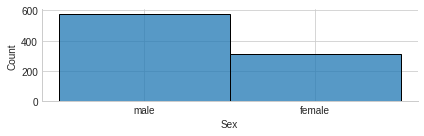

In [357]:
sns.displot(train['Sex'], kde=False, height=2, aspect=3)
plt.show()

"SibSp" and "Parch" columns are two related columns without any missing values. They don't have strange values and the distributions seem reasonable:

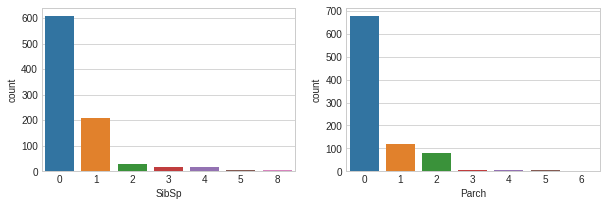

In [358]:
fig, ax = plt.subplots(1, 2, figsize = (10, 3)) 
sns.countplot(x='SibSp', data=train, ax=ax[0])
sns.countplot(x='Parch',data=train, ax=ax[1])
plt.show()

The ticket column has no missing values and contains 681 unique values: 

In [359]:
train['Ticket'].tail(10)

881              349257
882                7552
883    C.A./SOTON 34068
884     SOTON/OQ 392076
885              382652
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, dtype: object

Having the non-unique ticket numbers for 210 passenges is a suspicious case. On the other hand, the data is not well structured: most of the inputs involve only numbers but some has a text as well. Hence, it is not reasonable to try to figure out a logical pattern for relating the ticket number and the survival state. It seems convenient to drop this column.

THe "Fare" column involves floating numbers and there are no missing values but their distribution graph indicates some suspicious values:

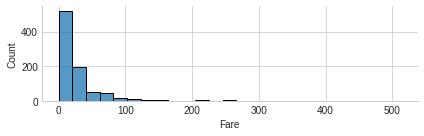

In [360]:
sns.displot(train['Fare'], bins=25, kde=False, height=2, aspect=3)
plt.show()

Despite most of the "Fare" data is less than 100$, there are prices up to ~500$. A better way of visualization to differentiate these suspicious values would be box, strip or swarm plot:

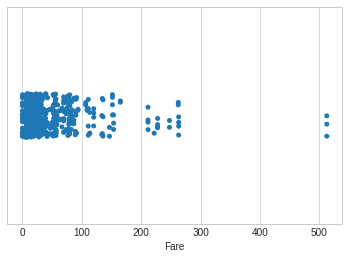

In [361]:
sns.stripplot(x='Fare', data=train)
plt.show()

There are 3 passenger who paid some extortionate price for tickets. Based on the preferences, those who paid more than 100, 200 or 300 can be considered as outliers. 

The "Embarked" column has only two missing values and the rest of the data is grouped under 3 "categories":

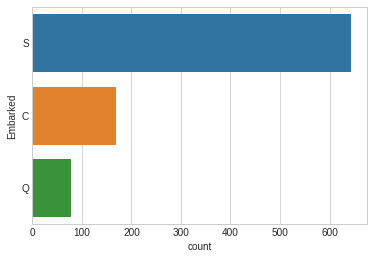

In [362]:
sns.countplot(y="Embarked", data=train)
plt.show()

Since the Titanic dataset is mostly used for developing models to predict if a passenger is survived or not, the most important column is the one called "Survived". It has no missing values and data is grouped into two numeric values (0 and 1):

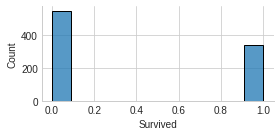

In [363]:
sns.displot(train['Survived'], kde=False, height=2, aspect=2)
plt.show()

At this stage, it is also practical to visualize interdependence among parameters with a correlation matrix. Below is the one with standard correlation coefficient (Pearson):

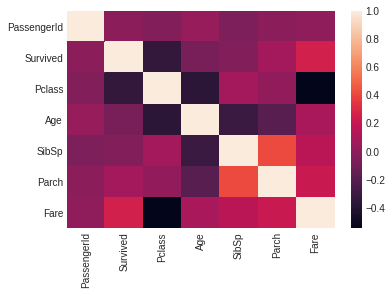

In [364]:
sns.heatmap(train.corr())
plt.show()

# STEP 3: Data Manupilation

Getting a general overview of the dataset and the columns, the next step is the manupilation of the columns that needs it to be more useful: 

-- some of them can be dropped 

-- some can be converted to a new datatype 

-- some can be processesed 

to be used more effectively. Hence, we need to derive questions in this manner:

1) Do we need all variables (columns) in the dataset? Can we eliminate some?
2) Do we need to transform some relevant variables for a better analysis or modeling?
3) Should we derive new variables using existing ones?

As we mentioned above, the name column is not expected to have influence of survival. Similarly, the "Passenger" is a sort of identifier with ascending unique numeric values and it is impossible to relate it with the survival. So, we can drop these two columns without doubt.

We considered to drop the "Cabin" column as well due to the high number of missing values and some strange values. Nevertheless, still there is room for exploiting some information: the inputs of "Cabin" column contains a capital letter as an identifier for regions of the ship. Since the region of the ship would be important for survival, it seems reasonable to keep this categorical data as a new column. After this, we can drop the "Cabin" column.

In [365]:
cabin_str = train["Cabin"].astype(str) # Convert data to str

first_letter = np.array([cabin[0] for cabin in cabin_str]) # Take first letter

train["Cabin_cat"] = pd.Categorical(first_letter)

train = train.drop(columns=['Name', 'Ticket', 'PassengerId','Cabin'])

A common practice for the datatype transformation is changing some variables (ones with few number of unique values) to the categorical variables to save memory (in large datasets) as well as to use conveniently in some plot types. More importantly, it is possible to assign the "order" while converting which is useful for sort, min() and max() functions. 

The list of unique values for each column can be viewed by:

In [366]:
train.nunique()

Survived       2
Pclass         3
Sex            2
Age           88
SibSp          7
Parch          7
Fare         248
Embarked       3
Cabin_cat      9
dtype: int64

The "Survived" column composed of 0 and 1 and can changed to "survived" and "not_survived" categories. Nevertheless, if you develop a model to submit the results to Kaggle, you have to keep the 0-1 format. Hence, let's keep it.

-- The "Pclass" column also have just three unique values that seems appropriate to be cateogorized as "Class1", "Class2" and "Class3". 

-- The "Sex" column has just two that can kept with same category names

-- The "Embarked" column has three unique values that can kept with same category names


We don't need to keep the original columns after transformation, thus, do in inplace:

In [367]:
train["Pclass"] = pd.Categorical(train["Pclass"],ordered=True).rename_categories(["Class1","Class2","Class3"])
train["Sex"] = pd.Categorical(train["Sex"])
train["Embarked"] = pd.Categorical(train["Embarked"])

#check the type:
print(train["Pclass"].dtype , train["Sex"].dtype)

category category


An important question while dealing with datasets is how to handle the missing values. A common way to replace the missing and strange numeric values is to substitute them. Based on the context, it is possible to use zeros, mean, median, forward fill, backward fill or more advanced methods (like KNN imputer) to replace missing ones. As you remember, there are 177 (891-714) missing values in the age column. Let's replace them with the mean: 

In [368]:
train["Age"] = np.where(train["Age"].isnull(),      #check the row if it is null or not
                       round(train["Age"].mean()),  #if so, replace with the mean
                       train["Age"])                #if not, keep the existing value

Let's see the final version of the dataset and the datatypes before analysis:

In [369]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_cat
0,0,Class3,male,22.0,1,0,7.2500,S,n
1,1,Class1,female,38.0,1,0,71.2833,C,C
2,1,Class3,female,26.0,0,0,7.9250,S,n
3,1,Class1,female,35.0,1,0,53.1000,S,C
4,0,Class3,male,35.0,0,0,8.0500,S,n
5,0,Class3,male,30.0,0,0,8.4583,Q,n
6,0,Class1,male,54.0,0,0,51.8625,S,E
7,0,Class3,male,2.0,3,1,21.0750,S,n
8,1,Class3,female,27.0,0,2,11.1333,S,n
9,1,Class2,female,14.0,1,0,30.0708,C,n


In [370]:
train.dtypes

Survived        int64
Pclass       category
Sex          category
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked     category
Cabin_cat    category
dtype: object

It is important to note that the data preparation is a continuous process. We may need to re-involve some dropped columns later if we differentiate their relevance or we can drop more if we recognize their irrelevance. Now, let's pick this form of the dataset and start investigating the interrelationship of survival with existing paramters (columns).

# STEP 4: FUNDEMANTAL ANALYSIS

We have put our columns in a better form (when needed) and made some early judgement about their relevance. Now, it is time to conduct basic and reasonable analysis.


## Role of Sex on Survival 
A useful and common Pandas function to use at this stage is groupby(). It allows us to quantify the interrelationship among two or several parameters. As an example, we kept the "Survived" column as 0-1, it can be used for sums and averaging:

In [371]:
survival_numbers_sex = train.groupby('Sex')['Survived'].sum()
print(survival_numbers_sex/survival_numbers_sex.sum())

Sex
female    0.681287
male      0.318713
Name: Survived, dtype: float64


In [372]:
survival_rate_sex = train.groupby('Sex')['Survived'].mean()
print(survival_rate_sex)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


~68% of the survivors were female and ~32% was male. Moreover, ~74% of the women and the 19% of the men in the ship were survived.

## Role of Cabin Category on Survival 


A same procedure can be repeated for other categorical parameters Pclass and Embarked. Here, it is repeated only for the "Cabin_cat" column that is a derived one (see above). 

In [373]:
survival_numbers_Cabin_cat = train.groupby('Cabin_cat')['Survived'].sum()
print(survival_numbers_Cabin_cat/survival_numbers_Cabin_cat.sum())

survival_rate_Cabin_cat = train.groupby('Cabin_cat')['Survived'].mean()
print(survival_rate_Cabin_cat)

Cabin_cat
A    0.020468
B    0.102339
C    0.102339
D    0.073099
E    0.070175
F    0.023392
G    0.005848
T    0.000000
n    0.602339
Name: Survived, dtype: float64
Cabin_cat
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64


For the available data, the passengers registered to ship regions B, D and E were more lucky than the ones in G and T, obviously.

## Role of Age on Survival 


We already had the distribution of ages of passengers above. What about the relation among survival and the age?


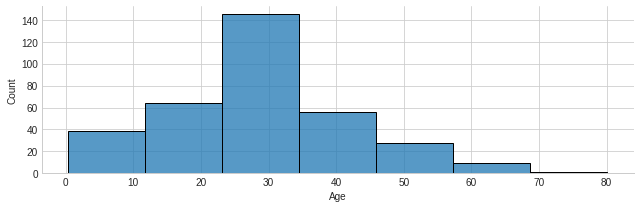

In [374]:
survival_age = train['Age'][train['Survived']==1].dropna()

sns.displot(survival_age, bins=7, kde=False, height=3, aspect=3)
plt.show()

At first glance, this graph may be interpretted as the passengers just below and above 30 are more probable to survive. To check it, take a look at the reverse case:

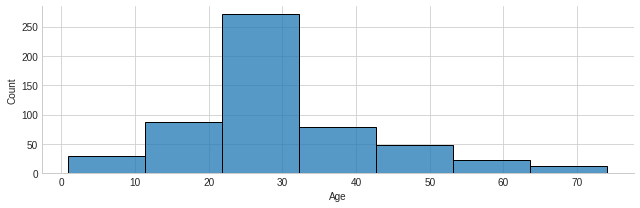

In [375]:
died_age = train['Age'][train['Survived']==0].dropna()
sns.displot(died_age, bins=7, kde=False, height=3, aspect=3)
plt.show()

A similar group is also most probable to die. For a better understanding, let's group ages and have a look at the percentages:

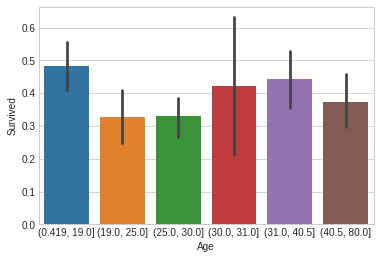

In [376]:
survival_age_data = train[['Age','Survived']].dropna()

ages = pd.qcut(survival_age_data['Age'], 6)

sns.barplot(x=ages, y='Survived', data=survival_age_data)
plt.show()

The graph shows that passengers smaller than 19 or in 30s are more prone to survive than others. 

## Role of Class on Survival 


In [377]:
survival_class = train.groupby('Pclass')['Survived'].mean()

print(survival_class)

Pclass
Class1    0.629630
Class2    0.472826
Class3    0.242363
Name: Survived, dtype: float64


The ratios of survivors for each class imlpy that Class1 passengers had more chance to survive.

## Role of Sibling/spouse on Survival

Another quick way to differentiate interdependency among to two columns of a dataset (if one is categorical or at least has few unique values) is using barplots:

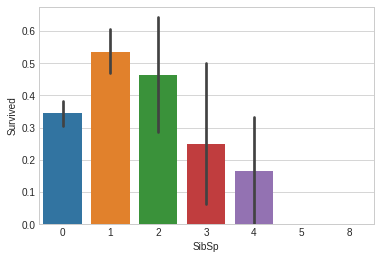

In [378]:
sns.barplot(x="SibSp", y="Survived", data=train)
plt.show()

It is possible to claim that passengers with a single sibling/splouse are more probable to survive but it is not possible to make interpretation for others.